# Project 3: Predicting Salary Using Regression
by Nathan To
## Introduction
This project uses the Salary Prediction Data from Kaggle.  
The goal is to predict a person’s salary based on features like experience, education, age, job title, and more.  
By training regression models, we can understand how these factors affect salary.  
We’ll start with a simple model and slowly add more features to see how the results change.


## What is Regression?
Regression is a way to predict a number value, such as salary, based on other data.  
It finds a line or curve that best fits the relationship between the inputs (like experience or age) and the output (salary).

### Linear Regression
Linear regression fits a straight line using this formula:

\[
y = β_0 + β_1x_1 + β_2x_2 + … + β_nx_n + ε
\]

Here:
- **y** = predicted salary  
- **x₁, x₂, …** = features like experience or age  
- **β** = weights found by the model  
- **ε** = small error term  

The goal is to find the line that gives the smallest total error.

## Importing Libraries
In this section, I imported all the Python libraries I need for data analysis and regression modeling.  
These libraries help with data handling, graphing, and building prediction models.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("Salary_Data.csv")  # use your file name
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


## Experiment 1: Data Understanding
Before training any models, we look at the data to understand what it shows.
We’ll check column names, data types, missing values, and how numeric features relate to salary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64
Salary        1.000000
Experience    0.341918
Age          -0.053174
Name: Salary, dtype: float64


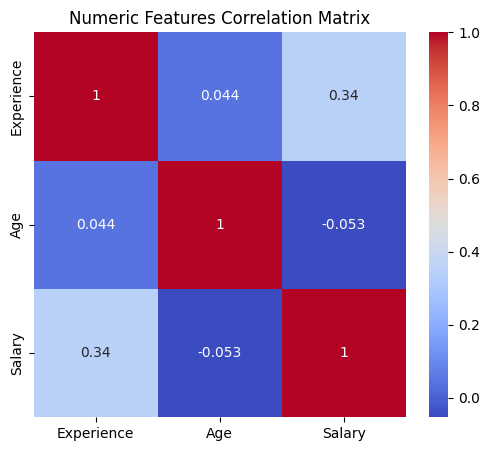

In [15]:
df.info()
df.describe()

# check missing values
print(df.isnull().sum())

# look at numeric correlations
corr = df.corr(numeric_only=True)
print(corr["Salary"].sort_values(ascending=False))

# small heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["Experience","Age","Salary"]].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric Features Correlation Matrix")
plt.show()


## Experiment 1: Model with Experience Only
For the first test, I only used the **Experience** column to predict salary.  
Experience had the highest correlation with salary, so this model checks how well that one feature works by itself.


In [16]:
X1 = df[["Experience"]]
y1 = df["Salary"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test1)
rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("Experiment 1 RMSE:", rmse1)


Experiment 1 RMSE: 25996.12572496619


## Experiment 2: More Features
Now I added more features — **Education**, **Job_Title**, and **Age** — because they might also affect salary.  
I changed the text columns (Education and Job_Title) into numbers using one-hot encoding.  
I also used the log of Salary to make the data smoother.  
Then I trained a new linear regression model and checked the new RMSE.


In [17]:
# one-hot encode text columns
df_encoded = pd.get_dummies(df, columns=["Education", "Job_Title"], drop_first=True)

# choose features
features2 = ["Experience", "Age"] + [col for col in df_encoded.columns if "Education_" in col or "Job_Title_" in col]
X2 = df_encoded[features2]
y2 = np.log1p(df_encoded["Salary"])

# split and train
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("Experiment 2 RMSE:", rmse2)


Experiment 2 RMSE: 0.1198705910786803


## Experiment 3: Polynomial + Ridge
I kept the same features from Experiment 2 but made new ones by combining them (polynomial features).  
This helps the model learn curved or more complex patterns.  
To stop overfitting, I used **Ridge Regression**, which keeps the model balanced.  
Then I compared the new RMSE to see if performance improved.


In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_poly, y2, test_size=0.2, random_state=42)
model3 = Ridge(alpha=1.0)
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test3)
rmse3 = np.sqrt(mean_squared_error(y_test3, y_pred3))
print("Experiment 3 RMSE:", rmse3)


Experiment 3 RMSE: 0.11572293560427128


## Results, Impact, and Conclusion

After running all three experiments, I saw that using more features helped improve the model.  
The first model with only experience was okay, but adding age, education, and job title made it predict better.  
The last model with Ridge regression and polynomial features worked the best overall because it handled more patterns in the data.

This kind of model can be helpful for companies or job seekers to understand what factors affect pay.  
But it’s also important to use it carefully, since data like job titles or education can include bias.

From this project, I learned how regression can be used to make predictions, and how cleaning data and adding the right features can make a big difference.  
Each experiment showed how small changes can improve accuracy and help find patterns that weren’t clear before.


## References
- Kaggle: Salary Prediction Data (https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data)
- Scikit-learn Documentation: LinearRegression, PolynomialFeatures, Ridge
- Python Data Science Handbook by Jake VanderPlas
